In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales',axis =1)

In [5]:
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [9]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [19]:
poly_features = polynomial_converter.transform(X)

In [20]:
poly_features.shape

(200, 9)

In [13]:
X.shape

(200, 3)

In [14]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [21]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [24]:
230.1 * 37.8
230.1 ** 2

52946.009999999995

In [25]:
# polynomial_converter.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [28]:
from sklearn .linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [31]:
model.fit(X_train,y_train)

LinearRegression()

In [32]:
test_predictions = model.predict(X_test)

In [33]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [35]:
MAE = mean_absolute_error(y_test,test_predictions)

In [36]:
MSE = mean_squared_error(y_test,test_predictions)

In [37]:
RMSE = np.sqrt(MSE)

In [38]:
MAE

0.4896798044803715

In [39]:
RMSE

np.float64(0.6646431757269157)

In [40]:
MSE

0.44175055104035965

In [41]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [42]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [43]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [57]:
# create the different order poly
# split poly feat  train/test
# fit on train
# store/save the rmse for both the train and test
# Plot the results (error vs poly order)

In [61]:
train_rmse_errors = []
test_rmse_errors = []

for   d in range(1,10):

    poly_converter = PolynomialFeatures(degree = d,include_bias = False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    model = LinearRegression()
    model.fit(X_train,y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse =np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [62]:
train_rmse_errors

[np.float64(1.734594124329376),
 np.float64(0.5879574085292233),
 np.float64(0.4339344356902069),
 np.float64(0.3517083688399348),
 np.float64(0.2509342951990948),
 np.float64(0.20953728870286512),
 np.float64(0.22046866295063955),
 np.float64(0.2714979031952939),
 np.float64(0.5132042823573217)]

In [63]:
test_rmse_errors

[np.float64(1.5161519375993875),
 np.float64(0.6646431757269157),
 np.float64(0.5803286825156327),
 np.float64(0.5077742623309995),
 np.float64(2.5758247707699033),
 np.float64(9.871387903168113),
 np.float64(41.33204244425813),
 np.float64(3103.1724270906684),
 np.float64(12768.365792576367)]

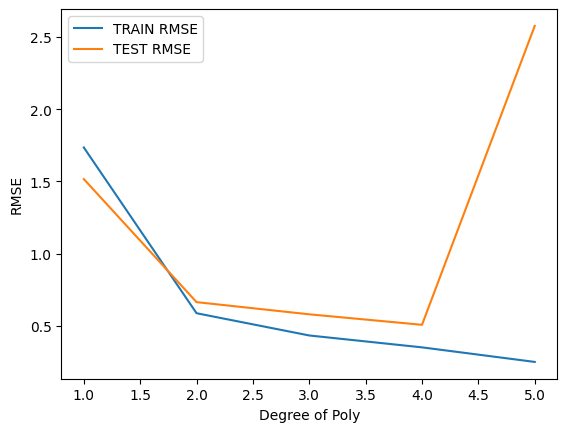

In [68]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')


plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

In [69]:
final_poly_convertor = PolynomialFeatures(degree=3,include_bias=False)

In [70]:
final_model = LinearRegression()

In [71]:
full_converted_X = final_poly_convertor.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [72]:
from joblib import dump,load

In [73]:
dump(final_model,'final_poly_model.joblib')


['final_poly_model.joblib']

In [74]:
dump(final_poly_convertor,'final_convertor.joblib')

['final_convertor.joblib']

In [75]:
loaded_convertor = load('final_convertor.joblib')

In [76]:
loaded_model = load('final_poly_model.joblib')

In [77]:
campaign = [[149,22,22]]

In [83]:
transformed_data = loaded_convertor.fit_transform(campaign)

In [84]:
loaded_model.predict(transformed_data)

array([14.60262555])